Задание 1
Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [21]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [9]:
data = boston["data"]
feature_names = boston["feature_names"]
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [78]:
target = boston["target"]
y = pd.DataFrame(target, columns=["price"])


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
y_pred_linear = lr.predict(X_test)


In [66]:
check_test= pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred_linear": y_pred_linear.flatten(),
})

check_test.head(10)

,y_test,y_pred_linear
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [67]:
r_2_linear = r2_score (check_test["y_test"], check_test["y_pred_linear"])
print (r_2_linear)

0.711226005748496


Задание 2
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [27]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
model=RandomForestRegressor(n_estimators=100, max_depth=12,random_state=42)

In [47]:
model.fit(X_train, y_train.values[:,0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [69]:
y_pred_forest = model.predict(X_test)

In [73]:
check_test["y_pred_forest"] = y_pred_forest
check_test.head(10)

,y_test,y_pred_linear,y_pred_forest
173,23.6,28.648960,23.156214
274,32.4,36.495014,31.199000
491,13.6,15.411193,16.011514
72,22.8,25.403213,24.227608
452,16.1,18.855280,16.940542
76,20.0,23.146689,21.847517
316,17.8,17.392124,19.732158
140,14.0,14.078599,14.911167
471,19.6,23.036927,21.508747
500,16.8,20.599433,21.239091


In [74]:
r_2_forest = r2_score (check_test["y_test"], check_test["y_pred_forest"])
print (r_2_forest)
print (r_2_linear)

0.8691643189868505
0.711226005748496


In [76]:
if r_2_forest  > r_2_linear:
    print ("Алгоритм RandomForest работает лучше линейной регрессии, поскольку его метрика качества r_2 больше")
elif r_2_linear  == r_2_forest:
    print ("Алгоритмы работают одинаково")  
else:
    print ("Алгоритм линейной регрессии  работает лучше чем RandomForest, поскольку его метрика качества r_2 больше")

Алгоритм RandomForest работает лучше линейной регрессии, поскольку его метрика качества r_2 больше


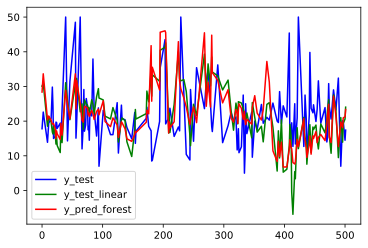

In [119]:
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

%config InlineBackend.figure_format = 'svg'

%matplotlib inline
check_test.sort_index(inplace=True)
plt.plot(check_test["y_test"], color="blue", label="y_test")
plt.plot (check_test["y_pred_linear"], color ="g", label="y_test_linear")
plt.plot(check_test["y_pred_forest"], color ="r", label="y_pred_forest")

plt.legend()

plt.show()